In [1]:
import pandas as pd
import geopandas

In [45]:
poi = geopandas.read_file("data/points-of-interest.geojson")
samm = geopandas.read_file("data/sammelstellen.geojson")
robidog = geopandas.read_file("data/hundekotbehalter.geojson")
merged = geopandas.read_file('data/merged.csv')

In [57]:
data = geopandas.GeoDataFrame(merged, geometry=geopandas.points_from_xy(merged.longitude, merged.latitude))
data = data.set_crs('EPSG:4326', allow_override=True)
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
epsg3857=poi.to_crs('EPSG:3857 ') # meters

In [5]:
first_point = epsg3857['geometry'].iloc[0]
poi['distance']=epsg3857['geometry'].distance(first_point)

In [6]:
poi.to_crs('EPSG:4326') # coordinates

,vorname,adresse,iv_grad,oeffnungsz,informatio,bezeichnun,iv_info,telefon,name,land,kategorie,adresszusa,firma,ort,zusatz,mobile,plz,geometry,distance
0,None,Schreinerstrasse 5,unbekannt,None,Test,GBS Baukaderschule,None,+41712265740,None,Schweiz,Aus- und Weiterbildung,None,None,St.Gallen,None,None,9000,POINT (9.37339 47.42208),0.000000
1,None,Burggraben 21,unbekannt,None,None,Kantonschule am Burggraben,None,+41712281414,None,Schweiz,Aus- und Weiterbildung,None,None,St.Gallen,None,None,9000,POINT (9.37998 47.42519),894.090032
2,None,Felsenstrasse 33,unbekannt,None,None,Sonderschule für Kinder mit Wahrnehmungsstörungen,None,+41712226642,None,Schweiz,Aus- und Weiterbildung,None,None,St.Gallen,None,None,9000,POINT (9.37592 47.42082),349.459758
3,None,Falkensteinstrasse 27,unbekannt,None,None,Kosmetik-Fachschule Cornelia Wagner,None,+41712446173,None,Schweiz,Aus- und Weiterbildung,None,None,St.Gallen,None,None,9000,POINT (9.39376 47.43052),2659.126217
4,None,Dufourstrasse 50,unbekannt,None,None,Universität St.Gallen HSG,None,+41712242111,None,Schweiz,Aus- und Weiterbildung,None,None,St.Gallen,None,None,9000,POINT (9.37438 47.43163),1576.505665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,None,St.Leonhard-Strasse,None,None,"Unterirdisch, Garage: 270",Parkgarage Neumarkt,None,None,None,Schweiz,"Parkplätze, Parkhäuser",None,None,St.Gallen,None,None,9000,POINT (9.37037 47.42202),336.364336
4970,None,Kolosseumstrasse,None,None,Erweiterte Blaue Zone: 11,None,None,None,None,Schweiz,"Parkplätze, Parkhäuser",None,None,St.Gallen,None,None,9008,POINT (9.39143 47.43704),3177.879870
4971,None,Haggenstrasse,None,None,Erweiterte Blaue Zone: 5,None,None,None,None,Schweiz,"Parkplätze, Parkhäuser",None,None,St.Gallen,None,None,9014,POINT (9.33552 47.41127),4575.595338
4972,None,Poststrasse 17,None,None,None,Liberté Café und more,None,None,None,Schweiz,"Bar, Dancing, Disco",None,None,St.Gallen,None,None,9000,POINT (9.37246 47.42442),399.143159


In [69]:
def join_nearest(left_set, right_set, max_dist=1000, plot=True):
    col_name = f'dist_to_right'
    left_meters = left_set.to_crs('EPSG:3857')
    right_meters = right_set.to_crs('EPSG:3857')
    res = left_meters.sjoin_nearest(right=right_meters, how='inner', max_distance=max_dist, distance_col=col_name)
    if plot:
        res.plot(col_name, legend=True)
    return res

,coord_x,coord_y,city,canton,year,street_name,street_number,multiple_floors,num_rooms,area,...,longitude,latitude,price,geometry,index_right,oeffnungsz,standort,sammelstel,abfallarten,dist_to_right
0,2747136.1,1256043.3,St. Gallen,SG,1965.0,Unterer Hompeliweg,4,0.0,2.0,56.0,...,9.389337257595118,47.43872666567338,,POINT (1045216.242 6013981.771),27,None,Bachstrasse,23,Aluminium; Dosen; Glas,644.074956
13,2747408.6,1255471.1,St. Gallen,SG,2019.0,Werkstrasse,3b,0.0,3.0,72.0,...,9.39275971819908,47.433520837525066,,POINT (1045597.229 6013125.029),27,None,Bachstrasse,23,Aluminium; Dosen; Glas,293.583830
36,2747150.9,1255937.6,St. Gallen,SG,1918.0,Heimatstrasse,3,0.0,4.0,95.0,...,9.389498567279476,47.43777297027178,,POINT (1045234.199 6013824.812),27,None,Bachstrasse,23,Aluminium; Dosen; Glas,495.935132
59,2747008.6,1255665.9,St. Gallen,SG,1919.0,Farbgutstrasse,12,0.0,2.0,54.0,...,9.38752332946376,47.43536181378008,,POINT (1045014.317 6013427.996),27,None,Bachstrasse,23,Aluminium; Dosen; Glas,467.726633
63,2747079.1,1255927.4,St. Gallen,SG,1968.0,Langgasse,51,0.0,2.0,60.0,...,9.388543691859534,47.43769730677188,,POINT (1045127.903 6013812.359),27,None,Bachstrasse,23,Aluminium; Dosen; Glas,546.923693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44853,2744438.5,1253730.3,St. Gallen,SG,1918.0,Zürcher Strasse,49,0.0,4.0,140.0,...,9.352838977634681,47.418526879686034,,POINT (1041153.272 6010657.894),29,07.30-10.30 / 14.00-16.30,Sömmerliwaldstrasse,31,Altmetall; Altöl; Aluminium; Dosen; Glas; Styr...,750.827514
44916,2744426.3,1253820.8,St. Gallen,SG,1918.0,Meisenstrasse,9,0.0,2.0,35.0,...,9.35270660271735,47.419343288207855,,POINT (1041138.537 6010792.209),29,07.30-10.30 / 14.00-16.30,Sömmerliwaldstrasse,31,Altmetall; Altöl; Aluminium; Dosen; Glas; Styr...,714.014361
44920,2744331.7,1253848.5,St. Gallen,SG,1918.0,Waldaustrasse,18,0.0,4.0,100.0,...,9.351462300524137,47.419613097429206,,POINT (1041000.021 6010836.599),29,07.30-10.30 / 14.00-16.30,Sömmerliwaldstrasse,31,Altmetall; Altöl; Aluminium; Dosen; Glas; Styr...,573.495366
44927,2743927.8,1254096.2,St. Gallen,SG,1972.0,Zwyssigstrasse,20,0.0,2.0,47.0,...,9.346191228546324,47.42192871517434,,POINT (1040413.248 6011217.577),29,07.30-10.30 / 14.00-16.30,Sömmerliwaldstrasse,31,Altmetall; Altöl; Aluminium; Dosen; Glas; Styr...,370.938372


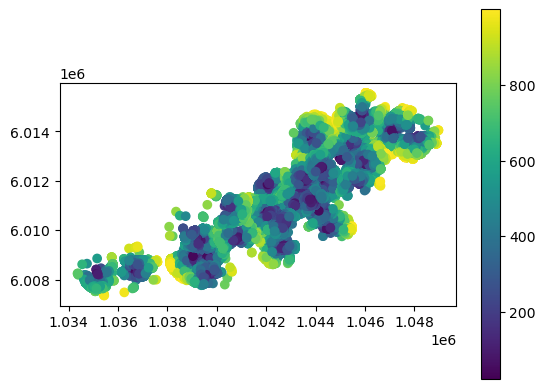

In [70]:
join_nearest(data, samm)